# Text Generation: introductory course (v1.0):
<img src="images/Logo_Labs_v3.png" style="width:500;height:150px;">

<img src="Clase1_v2/Clase1_v2.001.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.002.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.003.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.004.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.005.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.006.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.007.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.008.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.009.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.010.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.011.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.020.png" style="width:600;height:400px;">
-----------------------------------------------------------------------------------------------------------------------------
<img src="Clase1_v2/Clase1_v2.021.png" style="width:600;height:400px;">
-----------------------------------------------------------------------------------------------------------------------------
<img src="Clase1_v2/Clase1_v2.012.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.013.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.014.png" style="width:600;height:400px;">

[Para interactuar con la presentación ir a:](https://www.menti.com/cnefacajg5)

# Algunos parametros para graficar (no prestar mucha atención)

In [1]:
## -- Correr de todas formas...

###### ------------ Credit --
###### https://github.com/jermwatt/machine_learning_refined
# import standard plotting and animation
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output

# import autograd functionality
from autograd import grad as compute_grad   # The only autograd function you may ever need
import autograd.numpy as np
from autograd import hessian as compute_hess
import math
import time
from matplotlib import gridspec
import copy
from autograd.misc.flatten import flatten_func


### visualize the surface plot of cost function ###
def surface_plot(g,ax,wmax,view):
    ##### Produce cost function surface #####
    r = np.linspace(-wmax,wmax,200)

    # create grid from plotting range
    w1_vals,w2_vals = np.meshgrid(r,r)
    w1_vals.shape = (len(r)**2,1)
    w2_vals.shape = (len(r)**2,1)
    w_ = np.concatenate((w1_vals,w2_vals),axis = 1)
    g_vals = []
    for i in range(len(r)**2):
        g_vals.append(g(w_[i,:]))
    g_vals = np.asarray(g_vals)

    w1_vals.shape = (np.size(r),np.size(r))
    w2_vals.shape = (np.size(r),np.size(r))

    ### is this a counting cost?  if so re-calculate ###
    levels = np.unique(g_vals)
    if np.size(levels) < 30:
        # plot each level of the counting cost
        levels = np.unique(g_vals)
        for u in levels:
            # make copy of cost and nan out all non level entries
            z = g_vals.copy()
            ind = np.argwhere(z != u)
            ind = [v[0] for v in ind]
            z[ind] = np.nan

            # plot the current level
            z.shape = (len(r),len(r)) 
            ax.plot_surface(w1_vals,w2_vals,z,alpha = 0.4,color = '#696969',zorder = 0,shade = True,linewidth=0)

    else: # smooth cost function, plot usual
        # reshape and plot the surface, as well as where the zero-plane is
        g_vals.shape = (np.size(r),np.size(r))

        # plot cost surface
        ax.plot_surface(w1_vals,w2_vals,g_vals,alpha = 0.1,color = 'w',rstride=25, cstride=25,linewidth=1,edgecolor = 'k',zorder = 2)  

    ### clean up panel ###
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    ax.xaxis.pane.set_edgecolor('white')
    ax.yaxis.pane.set_edgecolor('white')
    ax.zaxis.pane.set_edgecolor('white')

    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

    ax.set_xlabel(r'$w_0$',fontsize = 12)
    ax.set_ylabel(r'$w_1$',fontsize = 12,rotation = 0)

    ax.view_init(view[0],view[1])
    
## -- Un optimizador para conseguir parametros abajo!! --

class MyOptimizersLS1:
    '''
    A list of current optimizers.  In each case - since these are used for educational purposes - the weights at each step are recorded and returned.
    '''

    ### gradient descent ###
    def gradient_descent(self,g,w,**kwargs):                
        # create gradient function
        self.g = g
        self.grad = compute_grad(self.g)
        
        # parse optional arguments        
        max_its = 100
        if 'max_its' in kwargs:
            max_its = kwargs['max_its']
        version = 'unnormalized'
        if 'version' in kwargs:
            version = kwargs['version']
        alpha = 10**-4
        if 'alpha' in kwargs:
            alpha = kwargs['alpha']
        steplength_rule = 'none'    
        if 'steplength_rule' in kwargs:
            steplength_rule = kwargs['steplength_rule']
        projection = 'None'
        if 'projection' in kwargs:
            projection = kwargs['projection']
        verbose = False
        if 'verbose' in kwargs:
            verbose = kwargs['verbose']
       
        # create container for weight history 
        w_hist = []
        w_hist.append(w)
        
        # start gradient descent loop
        if verbose == True:
            print ('starting optimization...')
        for k in range(max_its):   
            # plug in value into func and derivative
            grad_eval = self.grad(w)
            grad_eval.shape = np.shape(w)
            
            ### normalized or unnormalized descent step? ###
            if version == 'normalized':
                grad_norm = np.linalg.norm(grad_eval)
                if grad_norm == 0:
                    grad_norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
                grad_eval /= grad_norm
            
            # use backtracking line search?
            if steplength_rule == 'backtracking':
                alpha = self.backtracking(w,grad_eval)
                
            # use a pre-set diminishing steplength parameter?
            if steplength_rule == 'diminishing':
                alpha = 1/(float(k + 1))
            
            ### take gradient descent step ###
            w = w - alpha*grad_eval
            
            # record
            w_hist.append(w)     
         
        if verbose == True:
            print ('...optimization complete!')
            time.sleep(1.5)
            clear_output()
        
        return w_hist

    # backtracking linesearch module
    def backtracking(self,w,grad_eval):
        # set input parameters
        alpha = 1
        t = 0.8
        
        # compute initial function and gradient values
        func_eval = self.g(w)
        grad_norm = np.linalg.norm(grad_eval)**2
        
        # loop over and tune steplength
        while self.g(w - alpha*grad_eval) > func_eval - alpha*0.5*grad_norm:
            alpha = t*alpha
        return alpha
            
    #### newton's method ####            
    def newtons_method(self,g,w,**kwargs):        
        # create gradient and hessian functions
        self.g = g
        
        # flatten gradient for simpler-written descent loop
        flat_g, unflatten, w = flatten_func(self.g, w)
        
        self.grad = compute_grad(flat_g)
        self.hess = compute_hess(flat_g)  
        
        # parse optional arguments        
        max_its = 20
        if 'max_its' in kwargs:
            max_its = kwargs['max_its']
        self.epsilon = 10**(-5)
        if 'epsilon' in kwargs:
            self.epsilon = kwargs['epsilon']
        verbose = False
        if 'verbose' in kwargs:
            verbose = kwargs['verbose']
        
        # create container for weight history 
        w_hist = []
        w_hist.append(unflatten(w))
        
        # start newton's method loop  
        if verbose == True:
            print ('starting optimization...')
            
        geval_old = flat_g(w)
        for k in range(max_its):
            # compute gradient and hessian
            grad_val = self.grad(w)
            hess_val = self.hess(w)
            hess_val.shape = (np.size(w),np.size(w))

            # solve linear system for weights
            w = w - np.dot(np.linalg.pinv(hess_val + self.epsilon*np.eye(np.size(w))),grad_val)
                    
            # eject from process if reaching singular system
            geval_new = flat_g(w)
            if k > 2 and geval_new > geval_old:
                print ('singular system reached')
                time.sleep(1.5)
                clear_output()
                return w_hist
            else:
                geval_old = geval_new
                
            # record current weights
            w_hist.append(unflatten(w))
            
        if verbose == True:
            print ('...optimization complete!')
            time.sleep(1.5)
            clear_output()
        
        return w_hist

    
#### -----
def putStyle(sFont,syT,top1,R1):
    import matplotlib as mpl
    import matplotlib.style as style
    style.available
    ## Escogamos un tema 
    style.use('fivethirtyeight')

    # General plot parameters
    mpl.rcParams['font.family'] = 'Avenir'
    mpl.rcParams['font.size'] = sFont
    mpl.rcParams['axes.linewidth'] = 4
    mpl.rcParams['axes.spines.bottom'] = top1
    mpl.rcParams['axes.spines.right'] = R1
    mpl.rcParams['xtick.major.size'] = 10
    mpl.rcParams['xtick.major.width'] = 2
    mpl.rcParams['ytick.major.size'] = 10
    mpl.rcParams['ytick.major.width'] = syT
    mpl.rcParams['lines.linewidth']= 3

<img src="Clase1_v2/Clase1_v2.015.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.016.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.017.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.018.png" style="width:600;height:400px;">

# Analogía con la predicción de la velocidad de un objeto

In [42]:
import numpy as np
# El tiempo --
t = np.linspace(0, 10, 11)
print(t)
# La fuerza
F=5
# la masa
m=6
# La velocidad inicial
v0=0.
# Las velocidades:
v=[vi+v0 for vi in (F/m*t)]
print(v)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[0.0, 0.8333333333333334, 1.6666666666666667, 2.5, 3.3333333333333335, 4.166666666666667, 5.0, 5.833333333333334, 6.666666666666667, 7.5, 8.333333333333334]


In [43]:
#To start, using the set style allows us to easily elevate the level of our visualization
import matplotlib.style as style
style.available
## Escogamos un tema 
style.use('fivethirtyeight')

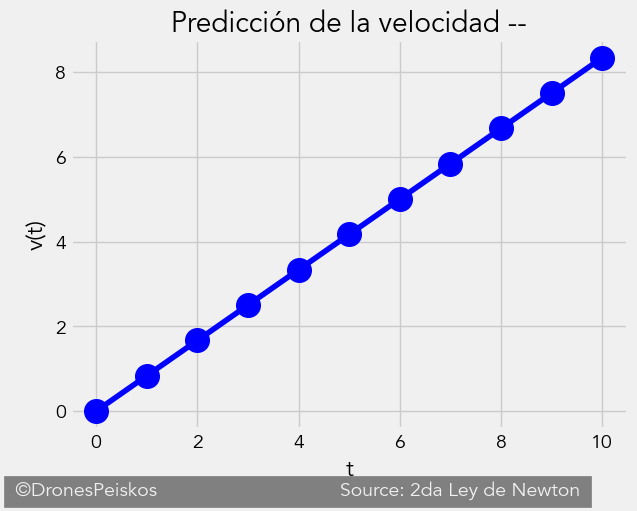

In [44]:
import matplotlib.pyplot as plt
# --
plt.plot(t, v, 
         color = 'blue', marker = "o", markersize=17)
plt.title("Predicción de la velocidad --")
plt.xlabel("t")
plt.ylabel("v(t)")
# The signature bar
plt.text(x = -1.7, y = -2,
    s = ' ©DronesPeiskos                                  Source: 2da Ley de Newton ',
              fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey');

<img src="Clase1_v2/Clase1_v2.020.png" style="width:600;height:400px;">
-----------------------------------------------------------------------------------------------------------------------------
<img src="Clase1_v2/Clase1_v2.025.png" style="width:600;height:400px;">

<img src="Clase1_v2/Clase1_v2.015.png" style="width:600;height:400px;">

## Tanh(x)

in_array :  [-3.14159265 -2.57039399 -1.99919533 -1.42799666 -0.856798   -0.28559933
  0.28559933  0.856798    1.42799666  1.99919533  2.57039399  3.14159265]

out_array :  [-0.99627208 -0.98836197 -0.96397069 -0.89125532 -0.69460424 -0.27807943
  0.27807943  0.69460424  0.89125532  0.96397069  0.98836197  0.99627208]


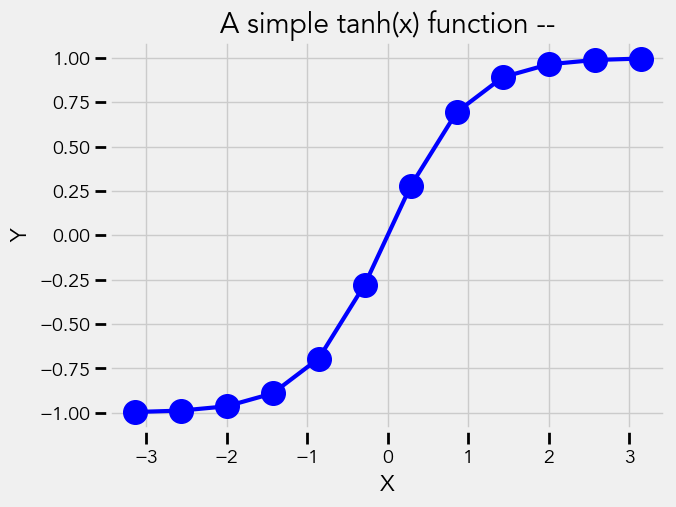

In [45]:
# Python program showing Graphical
# representation of tanh() function
import numpy as np
import matplotlib.pyplot as plt

## --- Estilo --
putStyle(14,2,True,True)
## -------------

in_array = np.linspace(-np.pi, np.pi, 12)
out_array = np.tanh(in_array)
  
print("in_array : ", in_array)
print("\nout_array : ", out_array)
  
# red for numpy.tanh()
plt.plot(in_array, out_array, 
         color = 'blue', marker = "o", markersize=17)
plt.title("A simple tanh(x) function --")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Operaciones con vectores y matrices:

## Sumando dos vectores o matrices

<div class="alert alert-block alert-info" style="font-size:24px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; 

 <b>A</b> + <b>B</b> 
    
 </div>

In [46]:
A=np.array([1,2,3]);
B=np.array([4,5,6]);
A+B

array([5, 7, 9])

<div class="alert alert-block alert-info" style="font-size:24px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; 
    
### Matrices
 <b>A</b> + <b>B</b> 
    
 </div>

In [47]:
np.array([[1,2,3],[11,22,33]])

array([[ 1,  2,  3],
       [11, 22, 33]])

In [48]:
A=np.array([[1,2,3],[11,22,33]]);
B=np.array([[4,5,6],[44,55,66]]);
A+B

array([[ 5,  7,  9],
       [55, 77, 99]])

## multiplicando dos vectores o matrices

<div class="alert alert-block alert-info" style="font-size:24px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; 

 <b>A</b> * <b>B</b> 
    
 </div>

In [49]:
A=np.array([[1,2,3],[11,22,33]]);
B=np.array([[4,5,6],[44,55,66],[11,22,33]]);
## Producto punto
print('El producto punto: \n', 
      np.dot(A,B))
##

El producto punto: 
 [[ 125  181  237]
 [1375 1991 2607]]


In [50]:
A=np.array([[1,2,3],[11,22,33]]);
B=np.array([[4,5,6],[44,55,66]]);
## Un producto diferente que se llama element-wise product.
A*B

array([[   4,   10,   18],
       [ 484, 1210, 2178]])

<div class="alert alert-block alert-info" style="font-size:44px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; 

Element-wise product -
    
$$ C = A \circ B $$
    
</div>

# ¿Cómo queda una RNN en Python?

<div class="alert alert-block alert-info" style="font-size:24px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; 
    
$$ h_t = \sigma_h(W_h x_t + U_h h_{(t-1)}+b_h) $$
$$ y_t = SOFTMAX_y(W_y h_t + b_y) $$
    
</div>

<img src="Clase1_v2/Clase1_v2.015.png" style="width:600;height:400px;">

In [51]:
import numpy as np
# Definición de Softmax --
def softmax(x):
    """Compute softmax values for each sets of y."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) #

# $$ y(x)^{SOFTMAX} = \frac{ \exp(x-x_{max})} { \sum{\exp(x)} }$$

In [52]:
softmax([0.4, 1.2])

array([0.31002552, 0.68997448])

<img src="Clase1_v2/Clase1_v2.030.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.031.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.032.png" style="width:600;height:400px;">
<img src="Clase1_v2/Clase1_v2.033.png" style="width:600;height:400px;">

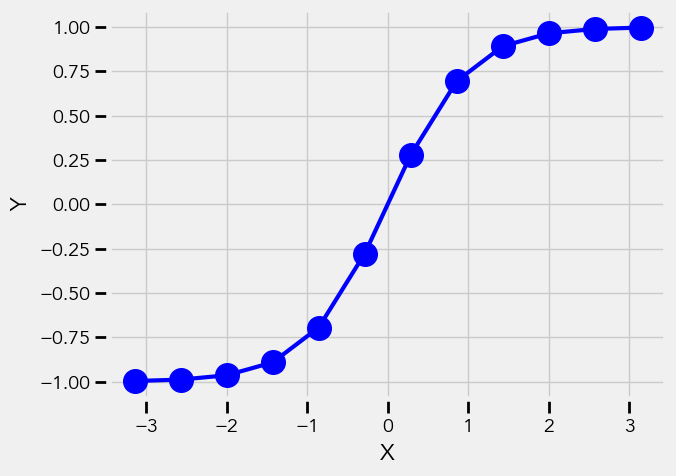

In [53]:
# numpy.tanh()
plt.plot(in_array, out_array, 
         color = 'blue', marker = "o", markersize=17)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
## -- Una función: Explicar!
def RNN_cell(xt, a_prev, parameters):
    
    # Retira los parametros de "parameters"
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]
    
    
    # Como dice arriba -- ####################################
    a_next1 = np.tanh(np.dot(Waa,a_prev)+np.dot(Wax,xt)+ba)
    ##########################################################
    
    
    # Esto es lo predicho --
    yt_pred1 = softmax(np.dot(Wya,a_next1)+by)
    
    # Almacena valores para usar luego --
    cache1 = (a_next1, a_prev, xt, parameters)
    
    return a_next1, yt_pred1, cache1

In [ ]:
nxt=1; mxt=1;
nap1=1; map1=mxt;
nya=2; mya=nap1;
mba=1;

np.random.seed(1)
xt = np.random.randn(nxt,mxt)
a_prev = np.random.randn(nap1,mxt)


## -- Creación de un diccionario: Explicar!
parameters = {}
# -----------------------------------------
parameters['Waa'] = np.random.randn(nap1,nap1)
parameters['Wax'] = np.random.randn(nap1,nxt)
parameters['Wya'] = np.random.randn(nya,mya)
parameters['ba'] = np.random.randn(nap1,mba)
parameters['by'] = np.random.randn(nya,mba)
RNN_cell(xt, a_prev, parameters)

In [ ]:
from IPython.display import display, Math

def print_matrix(array):
    data = ''
    for line in array:        
        if len(line) == 1:
            data += ' %.3f'%line #+ r' \\\n'
            continue
        for element in line:
            data += ' %.3f  &'%element
        data += r'\\' + '\n'
    display(Math('\\begin{bmatrix} \n%s\end{bmatrix}'%data))

In [ ]:
print('This is only x: ', xt) 
print('This is only aprev: ', a_prev)
print('This is by: ', parameters['by'])

In [ ]:
print_matrix(xt)

In [ ]:
parameters

In [ ]:
parameters['Waa'] = [[0.1]]
parameters['Wax'] = [[0.1]]
parameters['Wya'] = [[0.1],[0.35]]
parameters['ba'] = [[0.1]]
parameters['by'] = [[0.1],[0.1]]

In [ ]:
a_prev

In [ ]:
a_next, yt_pred, cache = RNN_cell([[0.08]], [[0.02]], parameters)

In [ ]:
print('This is only aNext: ', a_next[0]) # , a_next[1] 
print('This is only Yt: \n\n', yt_pred)
print('\n'*3)

# Entonces como es la dependencia de y con W? por ejemplo

In [ ]:
import matplotlib.pyplot as plt
## --- size point 
zp=5
# --
parameters['Waa'] = [[0.1]]
parameters['Wax'] = [[0.1]]
parameters['Wya'] = [[0.1],[0.1]]
parameters['ba'] = [[0.1]]
parameters['by'] = [[0.1],[0.1]] # Clave, que la forma de by sea asi! --

for i in np.linspace(-10,10):
    parameters['Wya'] = [[0.1],[i]] ## buena variación --
    xlabel='Wya'
    #parameters['by'] = [[0.1,i],[0.1,0.1]]
    #xlabel='by'
    
    
    
    #################################################################
    a_next, yt_pred, cache = RNN_cell([[0.1]], [[0.1]], parameters)
    #################################################################
    
    
    
    plt.title("Predicción de y --")
    plt.xlabel(xlabel)
    plt.ylabel("yt")
    ##### ------------------------
    plcol='blue'
    plt.plot(i, (yt_pred[0]), 
         color = plcol, marker = "o", markersize=zp)
    plt.text(x = -7.5, y = 0.6, s = 'yt[0]',
             color = plcol, weight = 'bold',fontsize=16, rotation = 0,
              backgroundcolor = '#f0f0f0');
    ## 
    plcol='red'
    plt.plot(i, yt_pred[1], 
         color = plcol, marker = "o", markersize=zp)
    plt.text(x = 7.5, y = 0.6, s = 'yt[1]',
             color = plcol, weight = 'bold',fontsize=16, rotation = 0,
              backgroundcolor = '#f0f0f0');

In [ ]:
xt.shape

# Para varias celdas seguidas --

<img src="Clase1_v2/Clase1_v2.029.png" style="width:600;height:400px;">

In [ ]:
def RNN_Hacia_Adelante(x, a0, parameters):
    
    # Arreglo para el Cache --
    caches = []
    
    # Dimensiones --
    n_x, m, T_x = x.shape
    n_y, n_a = parameters["Wya"].shape
    
    # Inicialización --
    a = np.zeros((n_a,m,T_x))
    yPred = np.zeros((n_y,m,T_x))
    
    # Inicialización de aNext --
    a_next = np.zeros((n_a,m))
    
    # Loop sobre el tiempo
    for t in range(T_x):
        # cada xt
        xt = x[:,:,t]
        a_next, yt_pred, cache = RNN_cell(xt, a0, parameters)
        # guardamos en un arreglo --
        a[:,:,t] = a_next
        # guardamos las ys --
        yPred[:,:,t] = yt_pred
        # guardamos en el cache --
        caches.append(cache)
    
    # Guardamos para luego -- Backpropagation --
    caches = (caches, x)
    
    return a, yPred, caches

In [ ]:
## Cantidad de palabras en la oración o tiempo Tx
Txt=2;

nxt=1; mxt=1;
nap1=1; map1=mxt;
nya=2; mya=nap1;
mba=1;

np.random.seed(1)
xt = np.random.randn(nxt,mxt,Txt)
a0 = np.random.randn(nap1,mxt)


## -- Creación de un diccionario: Explicar!
parameters = {}
# -----------------------------------------
parameters['Waa'] = np.random.randn(nap1,nap1)
parameters['Wax'] = np.random.randn(nap1,nxt)
parameters['Wya'] = np.random.randn(nya,mya)
parameters['ba'] = np.random.randn(nap1,mba)
parameters['by'] = np.random.randn(nya,mba)

## Construcción de varias celdas RNN --
aNext, Yt, caches = RNN_Hacia_Adelante(xt, a0, parameters)

In [ ]:
aNext

In [ ]:
Yt

In [ ]:
#caches

# Celda RNN hacia atrás

In [ ]:
def RNN_cell_Bck(da_next, cache):
    
    # Saca lo que hay en el Cache --
    (a_next, a_prev, xt, parameters) = cache
    
    # Retrieve values from parameters
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]

    # Gradiente respecto a Wax --
    dxt = np.dot(Wax.T,((da_next)*(1-(np.tanh(np.dot(Wax,xt)+np.dot(Waa,a_prev)+ba))**2)))
    dWax = np.dot((da_next)*(1-(np.tanh(np.dot(Wax,xt)+np.dot(Waa,a_prev)+ba))**2),xt.T)

    # Gradiente respecto a Waa
    da_prev = np.dot(Waa.T,((da_next)*(1-(np.tanh(np.dot(Wax,xt)+np.dot(Waa,a_prev)+ba))**2)))
    dWaa = np.dot((da_next)*(1-(np.tanh(np.dot(Wax,xt)+np.dot(Waa,a_prev)+ba))**2),a_prev.T)

    # Gradiente respecto a ba
    dba = np.sum((da_next)*(1-(np.tanh(np.dot(Wax,xt)+ \
                                       np.dot(Waa,a_prev)+ba))**2),axis=1,keepdims=True)
    
    # Guardamos todos los gradientes aqui en este diccionario --
    gradients = {"dxt": dxt, "da_prev": da_prev, "dWax": dWax, "dWaa": dWaa, "dba": dba}
    
    return gradients

In [ ]:
## Vamos a probar 1 sola celda hacia atras! --

nxt=1; mxt=1;
nap1=1; map1=mxt;
nya=2; mya=nap1;
mba=1;

np.random.seed(1)
xt = np.random.randn(nxt,mxt)
a_0 = np.random.randn(nap1,mxt)


## -- Creación de un diccionario: Explicar!
parameters = {}
# -----------------------------------------
parameters['Waa'] = np.random.randn(nap1,nap1)
parameters['Wax'] = np.random.randn(nap1,nxt)
parameters['Wya'] = np.random.randn(nya,mya)
parameters['ba'] = np.random.randn(nap1,mba)
parameters['by'] = np.random.randn(nya,mba)

## Construcción de una celda RNN --
_, _, cache_Temp = RNN_cell(xt, a_0, parameters)

da_next = np.random.randn(nap1,mxt)
Gradients = RNN_cell_Bck(da_next, cache_Temp)

In [ ]:
Gradients["dxt"].shape

# Cuentas analíticas

In [2]:
import sympy as sym
from sympy import Eq, simplify, Symbol
from sympy import Matrix, MatrixSymbol

In [3]:
def sample_2Classes(n, ratio=0.8):
    np.random.seed(42)
    y_0 = np.random.randint(2, size=(1, n))
    X = y_0 + (np.random.normal(size=n) / 5)
    return (X, y_0)

## Aqui es importante hablar de la arquitectura de la red neuronal
## por ahora vamos a suponer de entrada 7 escalares, formando un vector x --
npts = 7
### -----
xPoints, yPoints = sample_2Classes(npts)

In [ ]:
## Aqui es importante hablar de la arquitectura de la red neuronal
## la entrada va a pasar solo por una NEURONA "a". O sea, (n , m)
## n = 1, y m = 7
##

In [4]:
nwts = 1
xpts = MatrixSymbol('x', npts,nwts)
ypts = MatrixSymbol('y', npts,nwts)
wpts = MatrixSymbol('w', npts,nwts) #
#wpts2 = Matrix(npts,nwts, lambda i,j:sym.var('w_{%d%d}' % (i,j)))
#xpts2 = Matrix(npts,nwts, lambda i,j:sym.var('x_{%d%d}' % (i,j)))
#ypts2 = Matrix(npts,nwts, lambda i,j:sym.var('y_{%d%d}' % (i,j)))
sum(s for s in xpts)

x[0, 0] + x[1, 0] + x[2, 0] + x[3, 0] + x[4, 0] + x[5, 0] + x[6, 0]

In [5]:
## Un producto punto simbolico --
Matrix(xpts.T * wpts)

Matrix([[w[0, 0]*x[0, 0] + w[1, 0]*x[1, 0] + w[2, 0]*x[2, 0] + w[3, 0]*x[3, 0] + w[4, 0]*x[4, 0] + w[5, 0]*x[5, 0] + w[6, 0]*x[6, 0]]])

In [6]:
type(wpts[0])

sympy.matrices.expressions.matexpr.MatrixElement

In [7]:
## Tienes que decir que es un simbolo --
thetaij,x,xp,yp,w,T = sym.symbols('theta x x_p y_p w T')
## Indices para asuntos analiticos --
i,p,P = sym.symbols('i p P')
# Functions
Jcost_i_Sym = sym.symbols('J_i', cls=sym.Function)
Jcost_Sym = sym.symbols('J', cls=sym.Function)

In [8]:
## Definir una Sigmoid --
def Sigm(x):
    return 1/(1+sym.exp(-x))

In [9]:
## Individual Cost function --
Jcost_i_Sym1 = (Sigm(xpts.T * wpts)-yp)**2
Jcost_i_Sym1
#sym.diff(Jcost_i,x)

(-y_p + (1 + exp(-x.T*w))**(-1))**2

In [10]:
Jcost_Sym1 = sym.Sum(Jcost_i_Sym1,(p,1,P)) # agregar al final (-1/P)*
Jcost_Sym1

Sum((-y_p + (1 + exp(-x.T*w))**(-1))**2, (p, 1, P))

## Función Least Square

In [11]:
# compute linear combination of input point
def modelLS(x1,w1,i):
    a = Matrix(w1)[0] + Matrix(w1)[1]*Matrix(x1.T)[i]
    #a = w[0] + np.dot(x.T,w[1:])
    return a

In [12]:
modelLS(xpts,wpts,1)

w[0, 0] + w[1, 0]*x[1, 0]

In [13]:
nwts2=2
w2Class2 = ['w_{'+str(i)+',0}' for i in range(npts+1)] # MatrixSymbol('w', 2,1)
w2Class = MatrixSymbol('w', nwts2,nwts)
#[Symbol(s) for s in w2Class]
Symbol(w2Class2[1])

w_{1,0}

In [14]:
## ---
Jcost_Ana1 = sum((Sigm(modelLS(xpts,w2Class,i)) - \
     Matrix(ypts)[i])**2 for i in range(npts))
Jcost_Ana1

(-y[0, 0] + 1/(exp(-w[0, 0] - w[1, 0]*x[0, 0]) + 1))**2 + (-y[1, 0] + 1/(exp(-w[0, 0] - w[1, 0]*x[1, 0]) + 1))**2 + (-y[2, 0] + 1/(exp(-w[0, 0] - w[1, 0]*x[2, 0]) + 1))**2 + (-y[3, 0] + 1/(exp(-w[0, 0] - w[1, 0]*x[3, 0]) + 1))**2 + (-y[4, 0] + 1/(exp(-w[0, 0] - w[1, 0]*x[4, 0]) + 1))**2 + (-y[5, 0] + 1/(exp(-w[0, 0] - w[1, 0]*x[5, 0]) + 1))**2 + (-y[6, 0] + 1/(exp(-w[0, 0] - w[1, 0]*x[6, 0]) + 1))**2

In [15]:
Jcost_Ana2=Jcost_Ana1.subs({Matrix(ypts)[i]: yPoints[:,i][0] for i in range(npts)})
Jcost_Ana2

(-1 + 1/(exp(-w[0, 0] - w[1, 0]*x[1, 0]) + 1))**2 + (-1 + 1/(exp(-w[0, 0] - w[1, 0]*x[5, 0]) + 1))**2 + (exp(-w[0, 0] - w[1, 0]*x[6, 0]) + 1)**(-2) + (exp(-w[0, 0] - w[1, 0]*x[4, 0]) + 1)**(-2) + (exp(-w[0, 0] - w[1, 0]*x[3, 0]) + 1)**(-2) + (exp(-w[0, 0] - w[1, 0]*x[2, 0]) + 1)**(-2) + (exp(-w[0, 0] - w[1, 0]*x[0, 0]) + 1)**(-2)

In [16]:
Jcost_Ana3 = Jcost_Ana2.subs({Matrix(xpts)[i]: xPoints[:,i][0] for i in range(npts)})
Jcost_Ana3

(-1 + 1/(exp(-w[0, 0] - 1.42833168644332*w[1, 0]) + 1))**2 + (-1 + 1/(exp(-w[0, 0] - 0.91756230390557*w[1, 0]) + 1))**2 + (exp(-w[0, 0] + 0.239561285310791*w[1, 0]) + 1)**(-2) + (exp(-w[0, 0] + 0.185765620006787*w[1, 0]) + 1)**(-2) + (exp(-w[0, 0] + 0.177046069138319*w[1, 0]) + 1)**(-2) + (exp(-w[0, 0] + 0.0965237592896009*w[1, 0]) + 1)**(-2) + (exp(-w[0, 0] + 0.0189242003795944*w[1, 0]) + 1)**(-2)

In [17]:
## Vamos a ver un valor numerico con w0 = 0.1 y w1 = 0.1
Jcost_Ana3.subs(Matrix(w2Class)[0],0.1).subs(Matrix(w2Class)[1],0.1)/npts

0.251003518307944

## Función Cross- Entropy

In [18]:
## Individual Cost function --
Jcost_i_Sym2 = (-yp*sym.log(Sigm(xpts.T * wpts))-(1-yp)*(sym.log(1-Sigm(xpts.T * wpts))))
Jcost_i_Sym2
#sym.diff(Jcost_i,x)

-y_p*log((1 + exp(-x.T*w))**(-1)) - (1 - y_p)*log(1 - (1 + exp(-x.T*w))**(-1))

In [19]:
Jcost_Sym2 = sym.Sum(Jcost_i_Sym2,(p,1,P)) # agregar al final (-1/P)*
Jcost_Sym2

Sum(-y_p*log((1 + exp(-x.T*w))**(-1)) - (1 - y_p)*log(1 - (1 + exp(-x.T*w))**(-1)), (p, 1, P))

In [20]:
## ---
Jcost_Ana1_2 = sum(Matrix(ypts)[i]*(sym.log(Sigm(modelLS(xpts,w2Class,i)))) - \
     (1-Matrix(ypts)[i])*(sym.log(1-Sigm(modelLS(xpts,w2Class,i)))) for i in range(npts))
Jcost_Ana1_2

-(1 - y[0, 0])*log(1 - 1/(exp(-w[0, 0] - w[1, 0]*x[0, 0]) + 1)) - (1 - y[1, 0])*log(1 - 1/(exp(-w[0, 0] - w[1, 0]*x[1, 0]) + 1)) - (1 - y[2, 0])*log(1 - 1/(exp(-w[0, 0] - w[1, 0]*x[2, 0]) + 1)) - (1 - y[3, 0])*log(1 - 1/(exp(-w[0, 0] - w[1, 0]*x[3, 0]) + 1)) - (1 - y[4, 0])*log(1 - 1/(exp(-w[0, 0] - w[1, 0]*x[4, 0]) + 1)) - (1 - y[5, 0])*log(1 - 1/(exp(-w[0, 0] - w[1, 0]*x[5, 0]) + 1)) - (1 - y[6, 0])*log(1 - 1/(exp(-w[0, 0] - w[1, 0]*x[6, 0]) + 1)) + log(1/(exp(-w[0, 0] - w[1, 0]*x[0, 0]) + 1))*y[0, 0] + log(1/(exp(-w[0, 0] - w[1, 0]*x[1, 0]) + 1))*y[1, 0] + log(1/(exp(-w[0, 0] - w[1, 0]*x[2, 0]) + 1))*y[2, 0] + log(1/(exp(-w[0, 0] - w[1, 0]*x[3, 0]) + 1))*y[3, 0] + log(1/(exp(-w[0, 0] - w[1, 0]*x[4, 0]) + 1))*y[4, 0] + log(1/(exp(-w[0, 0] - w[1, 0]*x[5, 0]) + 1))*y[5, 0] + log(1/(exp(-w[0, 0] - w[1, 0]*x[6, 0]) + 1))*y[6, 0]

In [21]:
Jcost_Ana2_2=Jcost_Ana1_2.subs({Matrix(ypts)[i]: yPoints[:,i][0] for i in range(npts)})
Jcost_Ana2_2

-log(1 - 1/(exp(-w[0, 0] - w[1, 0]*x[0, 0]) + 1)) - log(1 - 1/(exp(-w[0, 0] - w[1, 0]*x[2, 0]) + 1)) - log(1 - 1/(exp(-w[0, 0] - w[1, 0]*x[3, 0]) + 1)) - log(1 - 1/(exp(-w[0, 0] - w[1, 0]*x[4, 0]) + 1)) - log(1 - 1/(exp(-w[0, 0] - w[1, 0]*x[6, 0]) + 1)) + log(1/(exp(-w[0, 0] - w[1, 0]*x[1, 0]) + 1)) + log(1/(exp(-w[0, 0] - w[1, 0]*x[5, 0]) + 1))

In [22]:
Jcost_Ana3_2 = Jcost_Ana2_2.subs({Matrix(xpts)[i]: xPoints[:,i][0] for i in range(npts)})
Jcost_Ana3_2

-log(1 - 1/(exp(-w[0, 0] + 0.0189242003795944*w[1, 0]) + 1)) - log(1 - 1/(exp(-w[0, 0] + 0.0965237592896009*w[1, 0]) + 1)) - log(1 - 1/(exp(-w[0, 0] + 0.177046069138319*w[1, 0]) + 1)) - log(1 - 1/(exp(-w[0, 0] + 0.185765620006787*w[1, 0]) + 1)) - log(1 - 1/(exp(-w[0, 0] + 0.239561285310791*w[1, 0]) + 1)) + log(1/(exp(-w[0, 0] - 1.42833168644332*w[1, 0]) + 1)) + log(1/(exp(-w[0, 0] - 0.91756230390557*w[1, 0]) + 1))

In [23]:
## Vamos a ver un valor numerico con w0 = 0.1 y w1 = 0.1
Jcost_Ana3_2.subs(Matrix(w2Class)[0],0.1).subs(Matrix(w2Class)[1],0.1)/npts

0.357646154901748

In [25]:
sym.diff(Jcost_Ana1_2,Matrix(w2Class)[0])

exp(-w[0, 0] - w[1, 0]*x[6, 0])*y[6, 0]/(exp(-w[0, 0] - w[1, 0]*x[6, 0]) + 1) + exp(-w[0, 0] - w[1, 0]*x[5, 0])*y[5, 0]/(exp(-w[0, 0] - w[1, 0]*x[5, 0]) + 1) + exp(-w[0, 0] - w[1, 0]*x[4, 0])*y[4, 0]/(exp(-w[0, 0] - w[1, 0]*x[4, 0]) + 1) + exp(-w[0, 0] - w[1, 0]*x[3, 0])*y[3, 0]/(exp(-w[0, 0] - w[1, 0]*x[3, 0]) + 1) + exp(-w[0, 0] - w[1, 0]*x[2, 0])*y[2, 0]/(exp(-w[0, 0] - w[1, 0]*x[2, 0]) + 1) + exp(-w[0, 0] - w[1, 0]*x[1, 0])*y[1, 0]/(exp(-w[0, 0] - w[1, 0]*x[1, 0]) + 1) + exp(-w[0, 0] - w[1, 0]*x[0, 0])*y[0, 0]/(exp(-w[0, 0] - w[1, 0]*x[0, 0]) + 1) - (y[6, 0] - 1)*exp(-w[0, 0] - w[1, 0]*x[6, 0])/((1 - 1/(exp(-w[0, 0] - w[1, 0]*x[6, 0]) + 1))*(exp(-w[0, 0] - w[1, 0]*x[6, 0]) + 1)**2) - (y[5, 0] - 1)*exp(-w[0, 0] - w[1, 0]*x[5, 0])/((1 - 1/(exp(-w[0, 0] - w[1, 0]*x[5, 0]) + 1))*(exp(-w[0, 0] - w[1, 0]*x[5, 0]) + 1)**2) - (y[4, 0] - 1)*exp(-w[0, 0] - w[1, 0]*x[4, 0])/((1 - 1/(exp(-w[0, 0] - w[1, 0]*x[4, 0]) + 1))*(exp(-w[0, 0] - w[1, 0]*x[4, 0]) + 1)**2) - (y[3, 0] - 1)*exp(-w[0, 0] - 

# Numpy de nuevo

In [32]:
def sample_2Classes(n, ratio=0.8):
    np.random.seed(42)
    y0 = np.random.randint(2, size=(1, n))
    X0 = y0 + (np.random.normal(size=n) / 5)
    return (X0, y0)

npts = 7
### -----
xPoints, yPoints = sample_2Classes(npts)

In [33]:
print(np.shape(xPoints))
print(np.shape(yPoints))

(1, 7)
(1, 7)


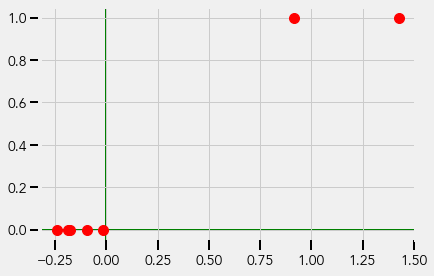

In [34]:
## --- Estilo --
putStyle(14,2,False,True)
## -------------

plt.plot(xPoints,yPoints, color = 'r',  marker = "o", markersize=10)
plt.axhline(y=0, color='g',zorder = 0,linewidth = 2)
plt.axvline(x=0, color='g',zorder = 0,linewidth = 2)
plt.show()

In [35]:
# Sigmoid
def sigmoidLS1(t):
    return 1/(1 + np.exp(-t))

# Una función costo NO-convexa! (que tiene minimos locales) 
def sigmoid_least_squaresLS1(w1):
    cost = 0
    for p1 in range(yPoints.size):
        x_p = xPoints[:,p1]
        y_p = yPoints[:,p1]
        ## --- Esto es para N=1 (w0 + w1*xp)
        ## Que significa que xp son escalares.
        ## Tambien pueden ser vectores, en cuyo caso N>1
        ## y la formula general sería np.dot(xp.T, w)
        cost += (sigmoidLS1(w1[0] + w1[1]*x_p) - y_p)**2
    return cost/yPoints.size  

In [36]:
sigmoid_least_squaresLS1([0.1,0.1]) # Perfecto! comparado con el analitico ...

array([0.25100352])

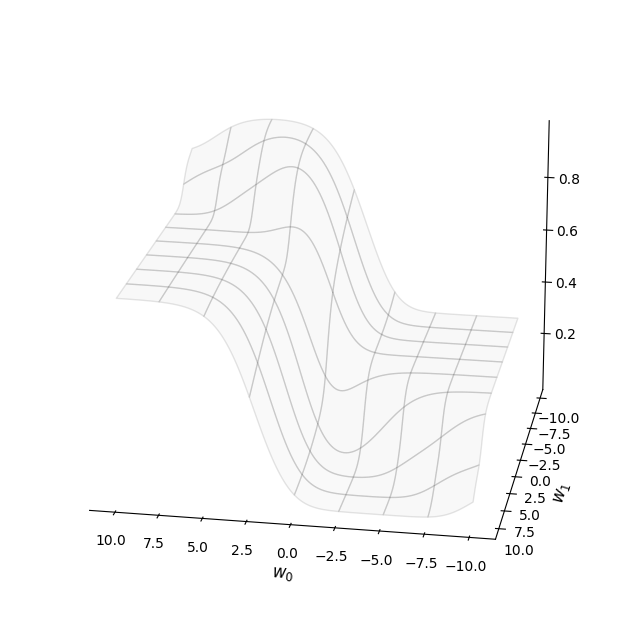

In [37]:
## --- Estilo --
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
## -------------

# construct figure
fig, axs = plt.subplots(1, 1, figsize=(8,8))

# create subplot with 2 panels
gs = gridspec.GridSpec(1, 1, width_ratios=[1]) 
ax1 = plt.subplot(gs[0],projection='3d');

# make contour plot in each panel
g = sigmoid_least_squaresLS1
surface_plot(g, ax1,  10,  [20,100])
plt.show()

# Vamos a encontrar los parametros ... 

In [38]:
# This code cell will not be shown in the HTML version of this notebook
## --- Estilo --
putStyle(14,2,True,True)
## -------------

opt = MyOptimizersLS1()

# run normalized gradient descent
wNum = np.asarray([20.0,-20.0])[:,np.newaxis]
w_hist = opt.gradient_descent(g = sigmoid_least_squaresLS1,w = wNum,version = 'normalized',\
                              max_its = 900, alpha = 1)

In [39]:
# -- Crédito: 
# https://github.com/jermwatt/machine_learning_refined
class ShowLS1:
    '''
    Visualize logistic regression applied to a 2-class dataset with N = 2
    '''
    #### initialize ####
    def __init__(self,data,g):
        # grab input
        data = data.T
        self.data = data
        self.x = data[:,:-1]
        self.y = data[:,-1]
        self.g = g
        
        # colors for viewing classification data 'from above'
        self.colors = ['cornflowerblue','salmon','lime','bisque','mediumaquamarine','b','m','g']
    
    ### logistic functionality ###
    def identity(self,t):
        val = 0
        if t > 0.5:
            val = 1
        return val
    
    # define sigmoid function
    def sigmoid(self,t):
        return 1/(1 + np.exp(-t))
    
    ######## 2d functions ########
    # animate gradient descent or newton's method
    def animate_run(self,savepath,w_hist,**kwargs):     
        self.w_hist = w_hist
        
        ##### setup figure to plot #####
        # initialize figure
        fig = plt.figure(figsize = (8,3))
        artist = fig
        
        # create subplot with 3 panels, plot input function in center plot
        gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
        ax1 = plt.subplot(gs[0]); 
        ax2 = plt.subplot(gs[1]);

        # produce color scheme
        s = np.linspace(0,1,len(self.w_hist[:round(len(w_hist)/2)]))
        s.shape = (len(s),1)
        t = np.ones(len(self.w_hist[round(len(w_hist)/2):]))
        t.shape = (len(t),1)
        s = np.vstack((s,t))
        self.colorspec = []
        self.colorspec = np.concatenate((s,np.flipud(s)),1)
        self.colorspec = np.concatenate((self.colorspec,np.zeros((len(s),1))),1)
        
        # seed left panel plotting range
        xmin = copy.deepcopy(min(self.x))
        xmax = copy.deepcopy(max(self.x))
        xgap = (xmax - xmin)*0.1
        xmin-=xgap
        xmax+=xgap
        x_fit = np.linspace(xmin,xmax,300)
        
        # seed right panel contour plot
        viewmax = 3
        if 'viewmax' in kwargs:
            viewmax = kwargs['viewmax']
        view = [20,100]
        if 'view' in kwargs:
            view = kwargs['view']
        num_contours = 15
        if 'num_contours' in kwargs:
            num_contours = kwargs['num_contours']        
        self.contour_plot(ax2,viewmax,num_contours)
        
        # start animation
        num_frames = len(self.w_hist)
        print ('starting animation rendering...')
        def animate(k):
            # clear panels
            ax1.cla()
            
            # current color
            color = self.colorspec[k]

            # print rendering update
            if np.mod(k+1,25) == 0:
                print ('rendering animation frame ' + str(k+1) + ' of ' + str(num_frames))
            if k == num_frames - 1:
                print ('animation rendering complete!')
                time.sleep(1.5)
                clear_output()
            
            ###### make left panel - plot data and fit ######
            # initialize fit
            w = self.w_hist[k]
            y_fit = self.sigmoid(w[0] + x_fit*w[1])
            
            # scatter data
            self.scatter_pts(ax1)
            
            # plot fit to data
            ax1.plot(x_fit,y_fit,color = color,linewidth = 2) 

            ###### make right panel - plot contour and steps ######
            if k == 0:
                ax2.scatter(w[0],w[1],s = 90,facecolor = color,edgecolor = 'k',linewidth = 0.5, zorder = 3)
            if k > 0 and k < num_frames:
                self.plot_pts_on_contour(ax2,k,color)
            if k == num_frames -1:
                ax2.scatter(w[0],w[1],s = 90,facecolor = color,edgecolor = 'k',linewidth = 0.5, zorder = 3)
               
            return artist,

        anim = animation.FuncAnimation(fig, animate ,frames=num_frames, interval=num_frames, blit=True)
        
        # produce animation and save
        fps = 50
        if 'fps' in kwargs:
            fps = kwargs['fps']
        anim.save(savepath, fps=fps, extra_args=['-vcodec', 'libx264'])
        clear_output()
            
    def sigmoid(self,t):
        return 1/(1 + np.exp(-t))
    
    # produce static image of gradient descent or newton's method run
    def static_fig(self,w_hist,**kwargs):
        self.w_hist = w_hist
        ind = -1
        show_path = True
        if np.size(w_hist) == 0:
            show_path = False
        w = 0
        if show_path:
            w = w_hist[ind]
        
        ##### setup figure to plot #####
        # initialize figure
        fig = plt.figure(figsize = (12,5))
        artist = fig
        
        # create subplot with 3 panels, plot input function in center plot
        gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1]) 
        ax1 = plt.subplot(gs[0]); 
        ax2 = plt.subplot(gs[2]);

        # produce color scheme
        s = np.linspace(0,1,len(self.w_hist[:round(len(self.w_hist)/2)]))
        s.shape = (len(s),1)
        t = np.ones(len(self.w_hist[round(len(self.w_hist)/2):]))
        t.shape = (len(t),1)
        s = np.vstack((s,t))
        self.colorspec = []
        self.colorspec = np.concatenate((s,np.flipud(s)),1)
        self.colorspec = np.concatenate((self.colorspec,np.zeros((len(s),1))),1)
        
        # seed left panel plotting range
        xmin = copy.deepcopy(min(self.x))
        xmax = copy.deepcopy(max(self.x))
        xgap = (xmax - xmin)*0.1
        xmin-=xgap
        xmax+=xgap
        x_fit = np.linspace(xmin,xmax,300)
        
        # seed right panel contour plot
        viewmax = 3
        if 'viewmax' in kwargs:
            viewmax = kwargs['viewmax']
        view = [20,100]
        if 'view' in kwargs:
            view = kwargs['view']
        num_contours = 15
        if 'num_contours' in kwargs:
            num_contours = kwargs['num_contours']   
            
        ### contour plot in right panel ###
        self.contour_plot(ax2,viewmax,num_contours)
        
        ### make left panel - plot data and fit ###
        # scatter data
        self.scatter_pts(ax1)
        
        if show_path:
            # initialize fit
            y_fit = self.sigmoid(w[0] + x_fit*w[1])

            # plot fit to data
            color = self.colorspec[-1]
            ax1.plot(x_fit,y_fit,color = color,linewidth = 2) 

            # add points to right panel contour plot
            num_frames = len(self.w_hist)
            for k in range(num_frames):
                # current color
                color = self.colorspec[k]

                # current weights
                w = self.w_hist[k]

                ###### make right panel - plot contour and steps ######
                if k == 0:
                    ax2.scatter(w[0],w[1],s = 90,facecolor = color,edgecolor = 'k',\
                                linewidth = 0.5, zorder = 3)
                if k > 0 and k < num_frames:
                    self.plot_pts_on_contour(ax2,k,color)
                if k == num_frames -1:
                    ax2.scatter(w[0],w[1],s = 90,facecolor = color,edgecolor = 'k',\
                                linewidth = 0.5, zorder = 3)
        
        plt.show()
            
    
    ###### plot plotting functions ######
    def plot_data(self,**kwargs):
        # construct figure
        fig, axs = plt.subplots(1, 3, figsize=(9,3))

        if np.shape(self.x)[1] == 1:
            # create subplot with 2 panels
            gs = gridspec.GridSpec(1, 3, width_ratios=[1,2,1]) 
            ax1 = plt.subplot(gs[0]); ax1.axis('off') 
            ax2 = plt.subplot(gs[1]); 
            ax3 = plt.subplot(gs[2]); ax3.axis('off')
        
            # scatter points
            self.scatter_pts(ax2)
            
        if np.shape(self.x)[1] == 2:
            gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
            ax1 = plt.subplot(gs[0],projection='3d'); 
            ax2 = plt.subplot(gs[1],aspect = 'equal'); 
            #gs.update(wspace=0.025, hspace=0.05) # set spacing between axes. 

            
            # plot points - first in 3d, then from above
            self.scatter_pts(ax1)
            self.separator_view(ax2)
            
            # set zaxis to the left
            self.move_axis_left(ax1)
            
            # set view
            if 'view' in kwargs:
                view = kwargs['view']
                ax1.view_init(view[0],view[1])
        
    # scatter points
    def scatter_pts(self,ax):
        if np.shape(self.x)[1] == 1:
            # set plotting limits
            xmax = copy.deepcopy(max(self.x))
            xmin = copy.deepcopy(min(self.x))
            xgap = (xmax - xmin)*0.2
            xmin -= xgap
            xmax += xgap
            
            ymax = max(self.y)
            ymin = min(self.y)
            ygap = (ymax - ymin)*0.2
            ymin -= ygap
            ymax += ygap    

            # initialize points
            ax.scatter(self.x,self.y,color = 'k', edgecolor = 'w',linewidth = 0.9,s = 40)

            # clean up panel
            ax.set_xlim([xmin,xmax])
            ax.set_ylim([ymin,ymax])
            
            # label axes
            ax.set_xlabel(r'$x$', fontsize = 12)
            ax.set_ylabel(r'$y$', rotation = 0,fontsize = 12)
            ax.set_title('data', fontsize = 13)
            
            ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
            ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)
            
        if np.shape(self.x)[1] == 2:
            # set plotting limits
            xmax1 = copy.deepcopy(max(self.x[:,0]))
            xmin1 = copy.deepcopy(min(self.x[:,0]))
            xgap1 = (xmax1 - xmin1)*0.35
            xmin1 -= xgap1
            xmax1 += xgap1
            
            xmax2 = copy.deepcopy(max(self.x[:,0]))
            xmin2 = copy.deepcopy(min(self.x[:,0]))
            xgap2 = (xmax2 - xmin2)*0.35
            xmin2 -= xgap2
            xmax2 += xgap2
            
            ymax = max(self.y)
            ymin = min(self.y)
            ygap = (ymax - ymin)*0.2
            ymin -= ygap
            ymax += ygap    

            # scatter points in both panels
            class_nums = np.unique(self.y)
            C = len(class_nums)
            for c in range(C):
                ind = np.argwhere(self.y == class_nums[c])
                ind = [v[0] for v in ind]
                ax.scatter(self.x[ind,0],self.x[ind,1],self.y[ind],s = 80,color = self.colors[c],edgecolor = 'k',linewidth = 1.5)

            # clean up panel
            ax.set_xlim([xmin1,xmax1])
            ax.set_ylim([xmin2,xmax2])
            ax.set_zlim([ymin,ymax])
            
            ax.set_xticks(np.arange(round(xmin1) +1, round(xmax1), 1.0))
            ax.set_yticks(np.arange(round(xmin2) +1, round(xmax2), 1.0))
            ax.set_zticks([-1,0,1])
            
            # label axes
            ax.set_xlabel(r'$x_1$', fontsize = 12,labelpad = 5)
            ax.set_ylabel(r'$x_2$', rotation = 0,fontsize = 12,labelpad = 5)
            ax.set_zlabel(r'$y$', rotation = 0,fontsize = 12,labelpad = -3)

            # clean up panel
            ax.xaxis.pane.fill = False
            ax.yaxis.pane.fill = False
            ax.zaxis.pane.fill = False

            ax.xaxis.pane.set_edgecolor('white')
            ax.yaxis.pane.set_edgecolor('white')
            ax.zaxis.pane.set_edgecolor('white')

            ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
            ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
            ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

    # plot data 'from above' in seperator view
    def separator_view(self,ax):
        # set plotting limits
        xmax1 = copy.deepcopy(max(self.x[:,0]))
        xmin1 = copy.deepcopy(min(self.x[:,0]))
        xgap1 = (xmax1 - xmin1)*0.05
        xmin1 -= xgap1
        xmax1 += xgap1
            
        xmax2 = copy.deepcopy(max(self.x[:,0]))
        xmin2 = copy.deepcopy(min(self.x[:,0]))
        xgap2 = (xmax2 - xmin2)*0.05
        xmin2 -= xgap2
        xmax2 += xgap2
            
        ymax = max(self.y)
        ymin = min(self.y)
        ygap = (ymax - ymin)*0.2
        ymin -= ygap
        ymax += ygap    

        # scatter points
        classes = np.unique(self.y)
        count = 0
        for num in classes:
            inds = np.argwhere(self.y == num)
            inds = [s[0] for s in inds]
            plt.scatter(self.data[inds,0],self.data[inds,1],color = self.colors[int(count)],linewidth = 1,marker = 'o',edgecolor = 'k',s = 50)
            count+=1
            
        # clean up panel
        ax.set_xlim([xmin1,xmax1])
        ax.set_ylim([xmin2,xmax2])

        ax.set_xticks(np.arange(round(xmin1), round(xmax1) + 1, 1.0))
        ax.set_yticks(np.arange(round(xmin2), round(xmax2) + 1, 1.0))

        # label axes
        ax.set_xlabel(r'$x_1$', fontsize = 12,labelpad = 0)
        ax.set_ylabel(r'$x_2$', rotation = 0,fontsize = 12,labelpad = 5)
            
    # plot points on contour
    def plot_pts_on_contour(self,ax,j,color):
        # plot connector between points for visualization purposes
        w_old = self.w_hist[j-1]
        w_new = self.w_hist[j]
        g_old = self.g(w_old)
        g_new = self.g(w_new)
     
        ax.plot([w_old[0],w_new[0]],[w_old[1],w_new[1]],color = color,linewidth = 3,alpha = 1,zorder = 2)      # plot approx
        ax.plot([w_old[0],w_new[0]],[w_old[1],w_new[1]],color = 'k',linewidth = 3 + 1,alpha = 1,zorder = 1)      # plot approx
    
    ###### function plotting functions #######
    def plot_ls_cost(self,**kwargs):
        # construct figure
        fig, axs = plt.subplots(1, 2, figsize=(8,3))

        # create subplot with 2 panels
        gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
        ax1 = plt.subplot(gs[0],aspect = 'equal'); 
        ax2 = plt.subplot(gs[1],projection='3d'); 
        
        # pull user-defined args
        viewmax = 3
        if 'viewmax' in kwargs:
            viewmax = kwargs['viewmax']
        view = [20,100]
        if 'view' in kwargs:
            view = kwargs['view']
        num_contours = 15
        if 'num_contours' in kwargs:
            num_contours = kwargs['num_contours']
        
        # make contour plot in left panel
        self.contour_plot(ax1,viewmax,num_contours)
        
        # make contour plot in right panel
        self.surface_plot(ax2,viewmax,view)
        
        plt.show()
        
    ### visualize the surface plot of cost function ###
    def surface_plot(self,ax,wmax,view):
        ##### Produce cost function surface #####
        wmax += wmax*0.1
        r = np.linspace(-wmax,wmax,200)

        # create grid from plotting range
        w1_vals,w2_vals = np.meshgrid(r,r)
        w1_vals.shape = (len(r)**2,1)
        w2_vals.shape = (len(r)**2,1)
        w_ = np.concatenate((w1_vals,w2_vals),axis = 1)
        g_vals = []
        for i in range(len(r)**2):
            g_vals.append(self.g(w_[i,:]))
        g_vals = np.asarray(g_vals)

        # reshape and plot the surface, as well as where the zero-plane is
        w1_vals.shape = (np.size(r),np.size(r))
        w2_vals.shape = (np.size(r),np.size(r))
        g_vals.shape = (np.size(r),np.size(r))
        
        # plot cost surface
        ax.plot_surface(w1_vals,w2_vals,g_vals,alpha = 0.1,color = 'w',rstride=25, cstride=25,linewidth=1,edgecolor = 'k',zorder = 2)  
        
        # clean up panel
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False

        ax.xaxis.pane.set_edgecolor('white')
        ax.yaxis.pane.set_edgecolor('white')
        ax.zaxis.pane.set_edgecolor('white')

        ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

        ax.set_xlabel(r'$w_0$',fontsize = 12)
        ax.set_ylabel(r'$w_1$',fontsize = 12,rotation = 0)
        ax.set_title(r'$g\left(w_0,w_1\right)$',fontsize = 13)

        ax.view_init(view[0],view[1])
        
    ### visualize contour plot of cost function ###
    def contour_plot(self,ax,wmax,num_contours):
        
        #### define input space for function and evaluate ####
        w1 = np.linspace(-wmax,wmax,100)
        w2 = np.linspace(-wmax,wmax,100)
        w1_vals, w2_vals = np.meshgrid(w1,w2)
        w1_vals.shape = (len(w1)**2,1)
        w2_vals.shape = (len(w2)**2,1)
        h = np.concatenate((w1_vals,w2_vals),axis=1)
        func_vals = np.asarray([ self.g(np.reshape(s,(2,1))) for s in h])

        #func_vals = np.asarray([self.g(s) for s in h])
        w1_vals.shape = (len(w1),len(w1))
        w2_vals.shape = (len(w2),len(w2))
        func_vals.shape = (len(w1),len(w2)) 

        ### make contour right plot - as well as horizontal and vertical axes ###
        # set level ridges
        levelmin = min(func_vals.flatten())
        levelmax = max(func_vals.flatten())
        cutoff = 0.5
        cutoff = (levelmax - levelmin)*cutoff
        numper = 3
        levels1 = np.linspace(cutoff,levelmax,numper)
        num_contours -= numper

        levels2 = np.linspace(levelmin,cutoff,min(num_contours,numper))
        levels = np.unique(np.append(levels1,levels2))
        num_contours -= numper
        while num_contours > 0:
            cutoff = levels[1]
            levels2 = np.linspace(levelmin,cutoff,min(num_contours,numper))
            levels = np.unique(np.append(levels2,levels))
            num_contours -= numper

        a = ax.contour(w1_vals, w2_vals, func_vals,levels = levels,colors = 'k')
        ax.contourf(w1_vals, w2_vals, func_vals,levels = levels,cmap = 'Blues')
                
        # clean up panel
        ax.set_xlabel('$w_0$',fontsize = 12)
        ax.set_ylabel('$w_1$',fontsize = 12,rotation = 0)
        ax.set_title(r'$g\left(w_0,w_1\right)$',fontsize = 13)

        ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
        ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)
        ax.set_xlim([-wmax,wmax])
        ax.set_ylim([-wmax,wmax])

In [40]:
data = np.concatenate((xPoints,yPoints))
data

array([[-0.23956129,  1.42833169, -0.0189242 , -0.18576562, -0.17704607,
         0.9175623 , -0.09652376],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ]])

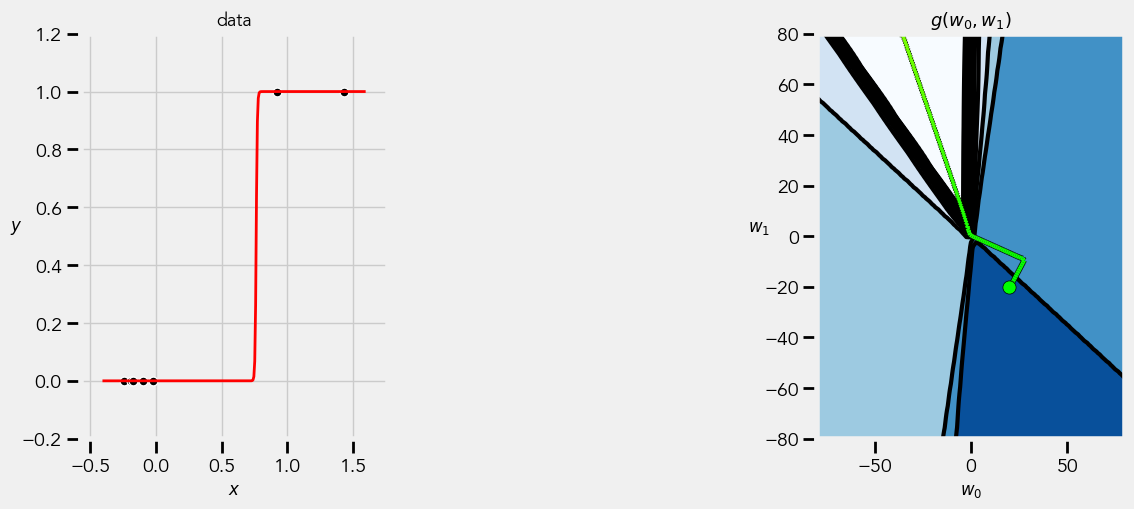

In [41]:
## --- Estilo --
putStyle(14,2,True,True)
## -------------

# Ajuste de la data
figOpt1 = ShowLS1(data,sigmoid_least_squaresLS1)

# Como se mueve el gradiente tambien ... 
figOpt1.static_fig(w_hist,  num_contours = 45,viewmax = 80)

<img src="Clase1_v2/Clase1_v2.020.png" style="width:600;height:400px;">
-----------------------------------------------------------------------------------------------------------------------------
<img src="Clase1_v2/Clase1_v2.026.png" style="width:600;height:400px;">
-----------------------------------------------------------------------------------------------------------------------------

# Ecuaciones fundamentales de la celda LSTM:

<div class="alert alert-block alert-info" style="font-size:24px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; 

$$ f_t = \sigma_g(W_f x_t + U_f h_{(t-1)}+b_f) $$
$$ i_t = \sigma_g(W_i x_t + U_i h_{(t-1)}+b_i) $$
$$ o_t = \sigma_g(W_o x_t + U_o h_{(t-1)}+b_o) $$
$$ \tilde{c}_t = \sigma_g(W_c x_t + U_c h_{(t-1)}+b_c) $$
$$ c_{t} = f_{t}\circ c_{t-1}+i_{t}\circ {\tilde {c}}_{t} $$
$$ h_{t} = o_{t}\circ \sigma _{h}(c_{t}) $$
    
</div>

<img src="Clase1_v2/Clase1_v2.016.png" style="width:600;height:400px;">

# TensorFlow: una herramienta util para producir Machine Learning rapidamente.

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
opt = tf.keras.optimizers.SGD()

## Generación de datos de pruebas (siempre!)

In [ ]:
n=3
y_0_Test = np.random.randint(2, size=(n, 1))
y_0_Test

In [ ]:
switch_Test = np.random.random(size=(n, 1)) <= 0.9
switch_Test

In [ ]:
y_1_Test = ~y_0_Test  & switch_Test
y_1_Test

In [ ]:
y_2_Test = ~y_0_Test  & ~switch_Test
y_2_Test

In [ ]:
np.concatenate([y_0_Test, y_1_Test, y_2_Test], axis=1)

In [ ]:
np.random.normal(size=n)

In [ ]:
y_0_Test + np.random.normal(size=n) # / 5  #[np.newaxis].T

...

In [ ]:
## -- Una función: Explicar un poco.
def sample_Classes(nClasses, n, ratio=0.8):
    np.random.seed(42)
    y_0 = np.random.randint(2, size=(n, 1))
    switch = (np.random.random(size=(n, 1)) <= ratio)
    ## Posiblemente explicar estos operadores logicos!
    ## & = AND    -     ~ = NOT 
    y_1 = ~y_0 & switch
    y_2 = ~y_0 & ~switch
    y = np.concatenate([y_0, y_1, y_2], axis=1)
    
    X = y_0 + (np.random.normal(size=n) / 5)[np.newaxis].T
    return (X, y)


## Generar la data sintetica
nClasses = 3
X_train, y_train = sample_Classes(nClasses, 1000)
X_test, y_test = sample_Classes(nClasses, 100)

In [ ]:
X_train[:,0].shape, y_train[:,0].shape

In [ ]:
X_train[:10]

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], y_train[:, 0], marker='x', c=y_train)

# Creación de una minuscula Red Neuronal 
# tres perceptrones, con función de activación Lineal (mx+b)

In [ ]:
clf = Sequential()
clf.add(Dense(3, activation='linear', input_shape=(1,), name='hidden'))
clf.add(Dense(nClasses, activation='softmax', name='out'))
clf.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
dot_img_file = './model_1.png'
tf.keras.utils.plot_model(clf, to_file=dot_img_file, show_shapes=True)

In [ ]:
clf.fit(X_train, y_train, epochs=10, batch_size=16)

In [ ]:
## Punto a predecir 
npre=767
print('Esta es la predicción: {}. \
Y este el valor real{}'.format(clf.predict(X_train[npre]), y_train[npre]))

# Una función logistica (sigmoid):
<div class="alert alert-block alert-info" style="font-size:24px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; 

$$ \sigma(x) = \frac{e^x}{e^x+1} $$

</div>

In [ ]:
def logistic_func(x): 
    return np.e**x/(np.e**x + 1)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
inpX = np.arange(-7, 7, 0.6)
plt.plot(inpX, 
         [logistic_func(x) for x in inpX]
        , color = 'orange', marker = "o", markersize=17)

In [ ]:
## Generar la data sintetica
nClases = 3
X_train, y_train = sample_Classes(nClases, 1000)
X_test, y_test = sample_Classes(nClases, 100)

In [ ]:
clf = Sequential()
clf.add(Dense(3, activation='sigmoid', input_shape=(1,), name='hidden'))
clf.add(Dense(3, activation='softmax', name='out'))
clf.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

clf.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

In [ ]:
fig = plt.figure(figsize=(9, 6))
plt.plot(range(len(clf.history.history['accuracy'])), 
         clf.history.history['accuracy'], 
         linewidth=4, marker = "o", markersize=17)
#import seaborn as sns; sns.despine()
plt.title("Sigmoid Activation Accuracy Per Epoch", fontsize=20)
pass

# Una celda RNN real con TensorFlow, y ver como actua una función de activación Tanh(x):

In [ ]:
y_train.shape

In [ ]:
clf = Sequential()
clf.add(Dense(3, activation='tanh', input_shape=(1,), name='hidden'))
clf.add(Dense(nClasses, activation='softmax', name='out'))
clf.compile(loss='categorical_crossentropy', 
            optimizer=opt, 
            metrics=['accuracy'])
clf.summary()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
inpX = np.arange(-7, 7, 0.8)
plt.plot(inpX, 
         [np.tanh(x) for x in inpX]
        , color = 'orange', marker = "o", markersize=17)

In [ ]:
clf.fit(X_train, y_train, epochs=10, batch_size=4, verbose=1)

In [ ]:
fig = plt.figure(figsize=(9, 6))
plt.plot(range(len(clf.history.history['accuracy'])),
         clf.history.history['accuracy'], 
         linewidth=4, marker = "o", markersize=17)
import seaborn as sns; sns.despine()
plt.title("Tanh Activation Accuracy Per Epoch", fontsize=20)
pass

In [ ]:
!pip install sci-kit-learn

In [ ]:
from sklearn.metrics import classification_report

## Hablar un poco, de que el modelo lo que
## predice no es la clase en si, si no las
## probabilidades. Asi que convirtamos en clases.

y_pred = clf.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred))

# Una celda RNN real con TensorFlow, y ver como actua una función de activación Relu(x):

In [ ]:
def relu(x):
    return 0 if x <= 0 else x

plt.plot(np.arange(-5, 5, 1), 
         [relu(x) for x in np.arange(-5, 5, 1)], 
         linewidth=4, marker = "o", markersize=17)
pass

In [ ]:
## Preguntar espontaneamente si corremos el modelo
## con una función de activación RELU?

<img src="Clase1_v2/Clase1_v2.020.png" style="width:600;height:400px;">
-----------------------------------------------------------------------------------------------------------------------------
<img src="Clase1_v2/Clase1_v2.027.png" style="width:600;height:400px;">
-----------------------------------------------------------------------------------------------------------------------------

# Proyecto final de curso: un código real para generar texto a partir de algún "corpus" de texto que consigas

In [ ]:
## -- Revisar que tienes el archivo en este directorio de trabajo
## https://arxiv.org/help/bulk_data
!ls ./TextGen-tf2/arXiv_DB

In [ ]:
## -- Levantar y transformar la data
import json
import re
import string
import itertools
import numpy as np
import tqdm

In [ ]:
## Vamos a probar un modelo basado en palabras y no en carateres.
## Al vocabulario sacado del corpus, le vamos a adicionar una lista
## muy común de caracteres adicionale.
vocab_pre = [n for n in string.printable]

In [ ]:
## Una pequeña prueba
data_file = './TextGen-tf2/arXiv_DB/arxiv-metadata-oai-snapshot.json'

gen_json = \
(json.loads(line) for line in \
 itertools.islice(open(data_file,'r'),10))


temp = []
for line in gen_json:
    temp.append(line['abstract'])

In [ ]:
temp[0]

In [ ]:
## Tomar una muestra mas grande ...
num_examples = 150000

# we will consider below 3 categories for training 
paper_categories = ["cs.AI", # Artificial Intelligence
                    "cs.CV", # Computer Vision and Pattern Recognition
                    "cs.LG"] # Machine Learning
categories=paper_categories

## Reading the json per se --
gen_json = \
(json.loads(line) for line in \
 itertools.islice(open(data_file,'r'),
                  num_examples) if json.loads(line).get('categories') in categories)


abs_list = []
for line in gen_json:
    abs = line['abstract'].lower()
    abs = re.sub(r'(\S)\s+(\S)',r'\1 \2',abs).replace('.\n','.\n\n')
    abs = abs.replace('â\x80\x99',"'")
    abs = abs.replace('\x7f',"")
    abs = abs.replace('â\x88\x9e',"'")
    abs = abs.replace('â\x89¤',"'")
    abs = abs.replace('â\x80\x94',"'")
    abs = abs.replace('â\x80\x93',"-")
  ## Anything custom here! --
    abs = abs.replace('â\x80\x9c',"<")
    abs = abs.replace('â\x80\x9d',">")
    abs = abs.replace('.'," .")
    abs = abs.replace(','," ,")
    abs = abs.replace('\n'," \n ")
    abs = abs.replace(')'," ) ")
    abs = abs.replace('('," ( ")
    abs = abs.replace(']'," ] ")
    abs = abs.replace('['," [ ")
    abs = abs.replace('{'," } ")
  ## -- For the word- based model --
    abs_list.append(abs)

abs_list = np.array(abs_list)

In [ ]:
## Cantidad de abstracts que leiste!
abs_list.shape

In [ ]:
abs_list[1].strip()

In [ ]:
result1 = []
for p in abs_list:
    result1.append(p.strip())

In [ ]:
result1[0].strip().split(' ')[:10]

In [ ]:
words = [w.strip().split(' ') for w in abs_list]

In [ ]:
## En formato requerido por el entrenaminto
words1=[]
for p in words:
    words1+=p

In [ ]:
words1[40:47]

In [ ]:
vocab = words1+vocab_pre

vocab = set(vocab)
vocab_size = len(vocab)
char2idx = {v:idx for idx,v in enumerate(vocab)}
idx2char= np.array(vocab)
int_to_char = dict((i, c) for i, c in enumerate(vocab))
## imprime
print("El tamaño de este vocabulario (con palabras unicas) es: ", vocab_size)
print('\n')

In [ ]:
## Hemos convertido palabras en numeros y viceversa
list(char2idx.items())[:4]

# Creando el modelo

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense

In [ ]:
text_as_int = np.array([char2idx[w] for w in words1], dtype=np.int32)
print ('{}\n Mapped to integers:\n {}'.format(repr(words1[:10]), text_as_int[:10]))

In [ ]:
seq_len = 20
batch_size = 48
dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
dataset = dataset.batch(seq_len+1,drop_remainder=True)
## x = 'hola como estas' ; y = 'como estas tu?' 
dataset = dataset.map(lambda x: (x[:-1],  x[1:]))
dataset = dataset.shuffle(30).batch(batch_size,drop_remainder=True)

In [ ]:
print([int_to_char[w] for w in text_as_int[:20-1]])
print("\n")
print([int_to_char[w] for w in text_as_int[1:20]])

In [ ]:
## Finamente la función que crea el modelo
def make_model(vocabulary_size,embedding_dimension,rnn_units,batch_size,stateful):
    model = Sequential()
    ## ---- Capas (2 LSTM seguidas)
    model.add(Embedding(vocabulary_size,embedding_dimension,
                      batch_input_shape=[batch_size,None]))
    
    ## -- Las dos capas van aqui!--------------------------------------
    model.add(LSTM(rnn_units,return_sequences=True,stateful=stateful))
    model.add(LSTM(rnn_units,return_sequences=True,stateful=stateful))
    ## -----------------------------------------------------------------
    
    model.add(Dense(vocabulary_size))
    ## ----
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer='adam',metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
emb_dim = 12
rnn_units = 128
model_1 = make_model(vocab_size,emb_dim,rnn_units,batch_size,False)

# Entrenando el modelo

In [ ]:
#- localmente , y para testeos iniciales --
checkpoint_dir = './checkpoints_Curso_v1'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

##---
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [ ]:
history1 = model_1.fit(dataset, 
                    epochs=20, batch_size=batch_size,
                    callbacks=[checkpoint_callback])

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(history1.history['loss'], 'g',color = 'blue', marker = "o", markersize=17)
plt.plot(history1.history['accuracy'], 'rx')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# -- si ha estado dificil -- guardar --
filename1='model_LSTM_Words1_param.hdf5'
model_1.save('./'+filename1)

In [ ]:
model_1 = make_model(vocab_size,emb_dim,rnn_units,1,True)
model_1.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model_1.build(tf.TensorShape([1,None]))

# Generando texto nuevo!

In [ ]:
def generate_text(model,seed,num_characters,remember1):
    seed_text = tf.expand_dims([char2idx[k] for k in seed.split(' ')],0)
    generated_text = []
    ## -- If you want to remember, then commented. Otherwise UN-coment
    if remember1: model.reset_states()
    for n in range(num_characters+1):
        result = tf.random.categorical(model(seed_text)[0,-1:],num_samples=1)
        result = result[0,0].numpy()
        generated_text.append(result)
        seed_text = tf.expand_dims([result],0)
    return ' '.join([int_to_char[k] for k in generated_text])

# Generar una linea de texto nuevo!

In [ ]:
## -- If you want to remember = False
remember1a=True
## -- The number of words to generate per line --
char2Gen=10

## Ex. 3 ----
nchar=36
nexte=6*char2Gen #
seed = str(result1[0][:nchar]).strip()
seedN = str(result1[0][nchar:nchar+nexte]).strip()

print('Seed --: '+seed+' <--> \n')
##---
for k in range(1):
    temp = generate_text(model_1,seed,char2Gen,remember1a)
    print('Pred.--: '+temp)

print('True --: '+seedN+' <--> \n')

# Generar varias lineas! 

In [ ]:
## -- If you want to remember = False
remember1a=False
## -- The number of words to generate per line --
char2Gen=10

## Ex. 1 ----
nchar=36
nexte=30
seed = str(result1[0][:nchar]).strip()
seedN = str(result1[0][nchar+1:nchar+1+nexte]).strip()

print('--: '+seed+' <--> \n')
##---
#print('** This is the generated text! **:')
for k in range(7):
    temp = generate_text(model_1,seed,char2Gen,remember1a)
    print(temp)
print('-'*80)

# Comentarios finales

<img src="Clase1_v2/Clase1_v2.028.png" style="width:600;height:400px;">